**Exploratory Data Analysis**

**Data Science**

MS in Artificial Intelligence - Tecnologico de Monterrey

---

*   Author: Ricardo Daniel Espinosa Castillo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analitica de Datos/4. Week 4/Actividad 4.EDA"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Part 1**. Descriptive Analysis (univariant)

1. Summary of data types, identifying numeric and categoric columns with `info()` method. **There are 8 numerical columns (float, int64) and 4 qualitative columns (object).**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Percentage of missing values per column. **Only the 'person_emp_length' and 'loan_int_rate' columns have 2.47% and 9.56% missing values respectively. The other variables do not have missing values.**

In [ ]:
df.isnull().sum()/df.shape[0]*100 #When determining % missing values, the '.isna()' function can be used instead of 'isnull()' and will give the same result.

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

# Numeric variables analysis

3. Getting descriptive statistics for all numerical variables:
* Central tendency (mean, median)
* Dispersion or variability (min, max, standard deviation, quartiles)
* Shape (skewness and kurtosis)
* Classification of the variables `person_age` and `loan_in_rate` according to the observed values of skewness and kurtosis

NOTE. Many of these statistics can be obtained using the describe() function and that the median is represented in the 2nd quartile (50%)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
#Central tendency (mean, median)
df.describe().iloc[[1,5]].T #extracting the descriptive table of the numerical values only from the rows (index) that contain the mean and median.

,mean,50%
person_age,27.734600,26.00
person_income,66074.848470,55000.00
person_emp_length,4.789686,4.00
loan_amnt,9589.371106,8000.00
loan_int_rate,11.011695,10.99
loan_status,0.218164,0.00
loan_percent_income,0.170203,0.15
cb_person_cred_hist_length,5.804211,4.00


In [ ]:
#Dispersion or variability (min, max, standard deviation, quartiles)
df.describe().iloc[2:].T #extracting the descriptive table of the numerical values only of the rows (index) that contain min, max, standard deviation, quartiles.

,std,min,25%,50%,75%,max
person_age,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
#Shape (skewness) of numerical values only.
df.skew(numeric_only=True)

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [ ]:
#Shape (kurtosis) of numerical values only.
df.kurt(numeric_only=True)

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

Classifying the variables `person_age` and `loan_in_rate` according to the observed values of skewness and kurtosis:

Skewness:

* **person_age - positive skew**
* **loan_in_rate - approximately symmetric but slightly positively skewed**

Kurtosis:

* **person_age – leptokurtic kurtosis**
* loan_in_rate - platykurtic kurtosis

4. Using histograms to determine the distribution of the values represented in each variable.

Real data is more complex than theory. For this reason, always remember to accompany the asymmetry analysis with a graph such as a histogram.

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >]],
      dtype=object)

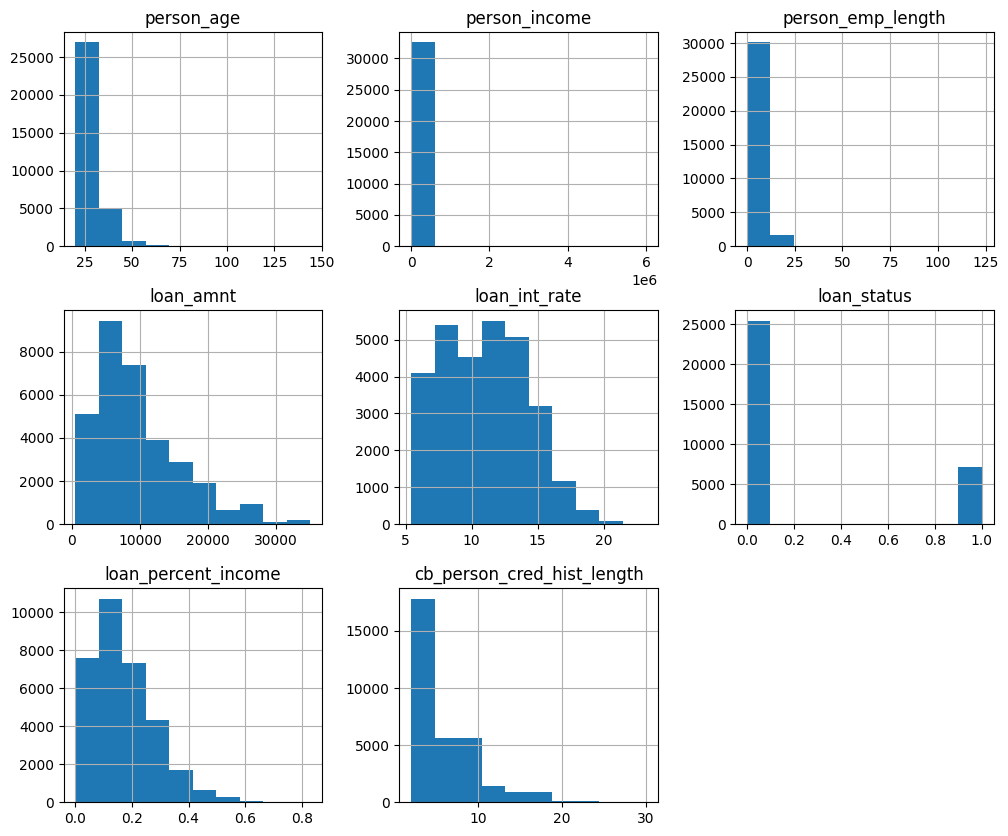

In [ ]:
#Plotting histograms for each of the numerical variables.
df.hist(figsize=(12,10))

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'loan_int_rate'}>]], dtype=object)

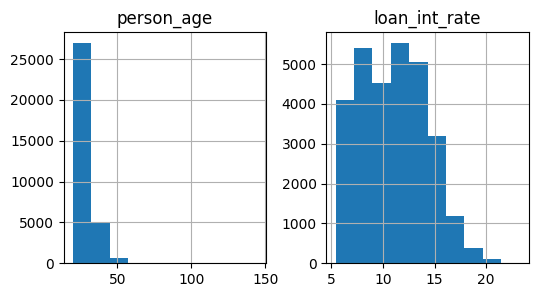

In [ ]:
#Plotting histograms only for person_age and loan_int_rate.
df[['person_age','loan_int_rate']].hist(figsize=(6,3))

5. Using boxplots to show the distribution of the data across its quartiles..

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__

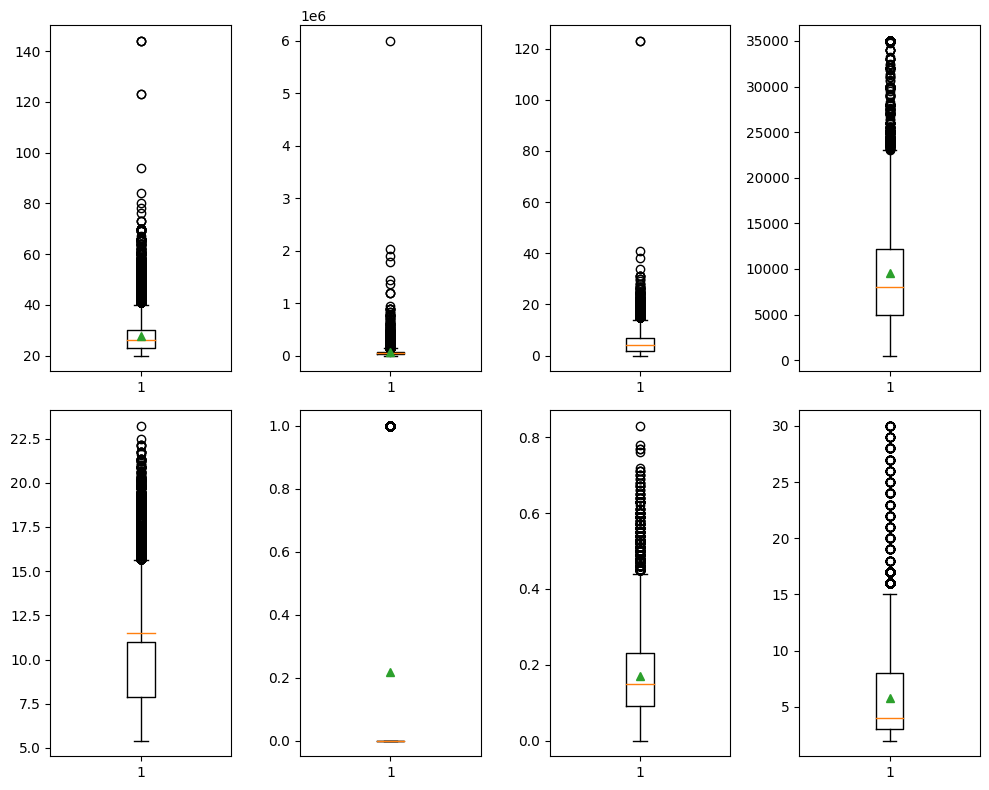

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(10,8))
axes[0,0].boxplot(df['person_age'], showmeans=True)
axes[0,1].boxplot(df['person_income'], showmeans=True)
axes[0,2].boxplot(np.array(df['person_emp_length'], dtype=object), showmeans=True)
axes[0,3].boxplot(df['loan_amnt'], showmeans=True)
axes[1,0].boxplot(np.array(df['loan_int_rate'], dtype=object), showmeans=True)
axes[1,1].boxplot(df['loan_status'], showmeans=True)
axes[1,2].boxplot(df['loan_percent_income'], showmeans=True)
axes[1,3].boxplot(df['cb_person_cred_hist_length'], showmeans=True)

plt.tight_layout()
plt.show()

To view the boxplots individually:

([<matplotlib.axis.XTick at 0x7ca23c5fbf70>], [Text(1, 0, 'person_age')])

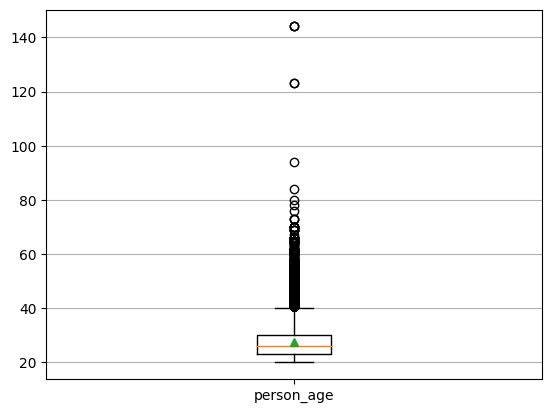

In [ ]:
#Boxplot for the age variable ('person_age').
plt.boxplot(df['person_age'], showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1],['person_age'])

([<matplotlib.axis.XTick at 0x7ca23c52c9a0>], [Text(1, 0, 'person_income')])

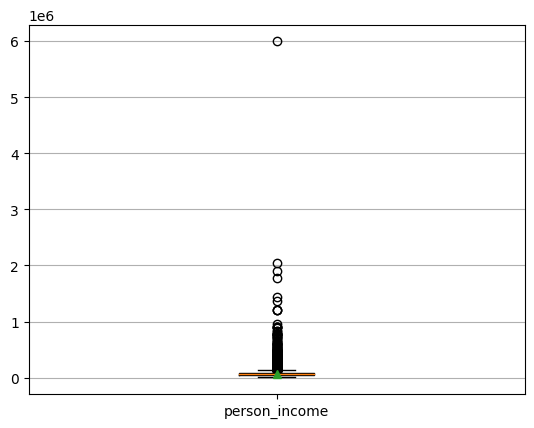

In [ ]:
#Boxplot for the income variable ('person_income').
plt.boxplot(df['person_income'], showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1],['person_income'])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


([<matplotlib.axis.XTick at 0x7ca23e5ac8e0>],
 [Text(1, 0, 'person_emp_length')])

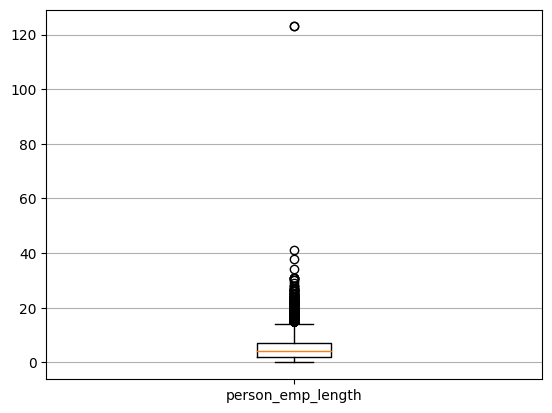

In [ ]:
#Boxplot for the employment time variable ('person_emp_length').
plt.boxplot(np.array(df['person_emp_length'], dtype=object), showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1],['person_emp_length'])

([<matplotlib.axis.XTick at 0x7ca23c5fa770>], [Text(1, 0, 'loan_amnt')])

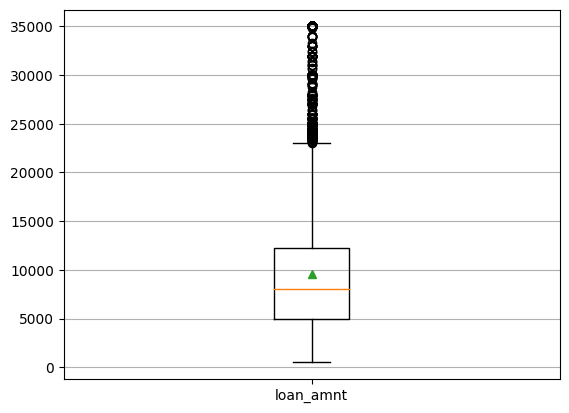

In [ ]:
#Boxplot for the variable loan amount ('loan_amnt').
plt.boxplot(df['loan_amnt'], showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1], ['loan_amnt'])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


([<matplotlib.axis.XTick at 0x7ca23c2ac4c0>], [Text(1, 0, 'loan_int_rate')])

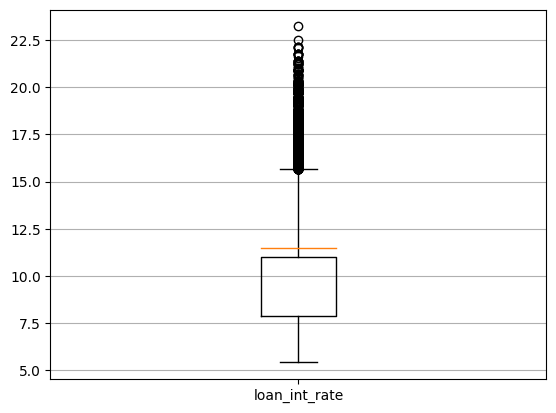

In [ ]:
#Boxplot for the loan interest variable ('loan_int_rate').
plt.boxplot(np.array(df['loan_int_rate'], dtype=object), showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1], ['loan_int_rate'])

([<matplotlib.axis.XTick at 0x7ca23c31ceb0>], [Text(1, 0, 'loan_status')])

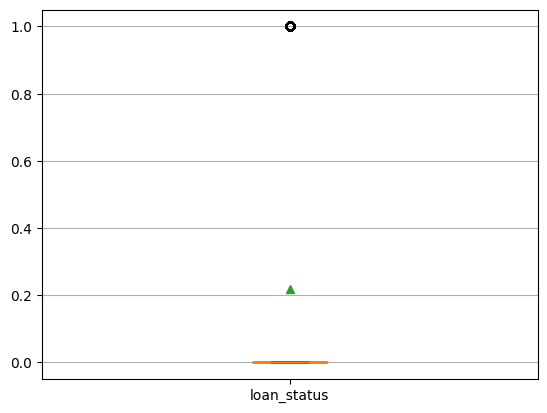

In [ ]:
#Boxplot for the loan status variable ('loan_status').
plt.boxplot(df['loan_status'], showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1], ['loan_status'])

([<matplotlib.axis.XTick at 0x7ca23c173cd0>],
 [Text(1, 0, 'loan_percent_income')])

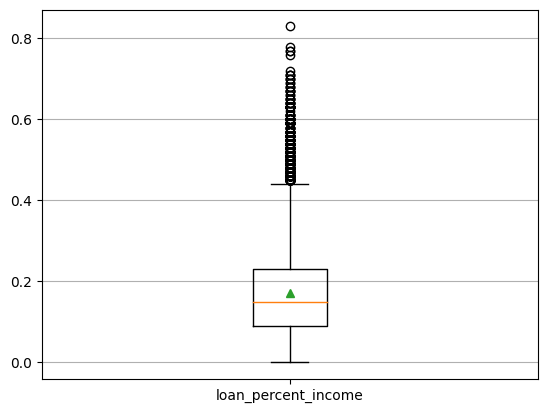

In [ ]:
#Boxplot for the variable percentage of loan income ('loan_percent_income').
plt.boxplot(df['loan_percent_income'], showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1], ['loan_percent_income'])

([<matplotlib.axis.XTick at 0x7ca23c1e2710>],
 [Text(1, 0, 'cb_person_cred_hist_length')])

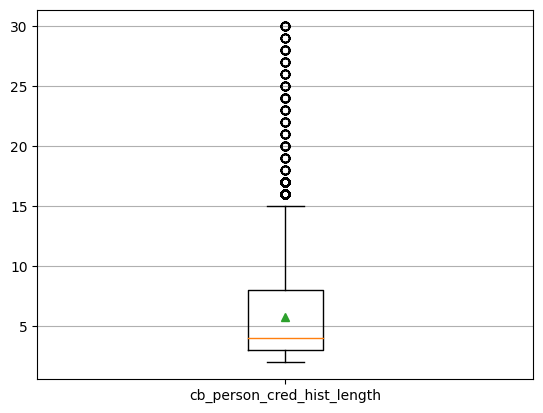

In [ ]:
#Boxplot for credit history variable ('cb_person_cred_hist_length').
plt.boxplot(df['cb_person_cred_hist_length'], showmeans=True)
plt.grid(True, axis='y')
plt.xticks([1], ['cb_person_cred_hist_length'])

*   Run the following code to identify outliers in the `person_age` variable.

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
#Outlier unique values obtained from the IQR_outliers df.
IQR_outliers['person_age'].unique()

array([144, 123,  50,  45,  44,  43,  41,  46,  47,  42,  48,  49,  58,
        65,  51,  53,  66,  61,  54,  57,  59,  62,  60,  55,  52,  64,
        70,  78,  69,  56,  73,  63,  94,  80,  84,  76,  67])

# Analysis of categorical variables

 6. Obtain the following descriptive statistics for all categorical variables:
* Central tendency (mode)
* Cardinality (number of unique values)
* Unique counts (number of occurrences for each unique value)

**NOTE**. You can obtain a summary of these statistics by indicating in the `describe()` function that only variables of type object will be included, which in this case coincide with the categorical ones: `describe(include = 'object')`. For counts use the function `df["column"].value_counts()`

**For practical purposes of points 6 and 7, a new df called 'cat' is created to obtain the descriptive statistics and the realization of the graphs.**

In [ ]:
cat = df[['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']] #defining a new df for categorical variables.
cat.describe(include = 'object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [ ]:
#Cardinality (number of unique values for each column).
cat.nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [ ]:
#Unique counts (number of occurrences for each unique value in the 'person_home_ownership' column).
cat['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [ ]:
#Unique counts (number of occurrences for each unique value in the 'loan_intent' column).
cat['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [ ]:
#Unique counts (number of occurrences for each unique value in the 'loan_grade' column).
cat['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [ ]:
#Unique counts (number of occurrences for each unique value in the 'cb_person_default_on_file' column).
cat['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

7. Use bar graphs by variable to represent the frequency of each category.

**NOTE**. seaborn has a count graph, for categorical variables, that calculates the frequency of each category without using the `value_counts()` function. To generate it you must indicate the column: `sns.countplot(x="column", data=df) `

<Axes: xlabel='person_home_ownership', ylabel='count'>

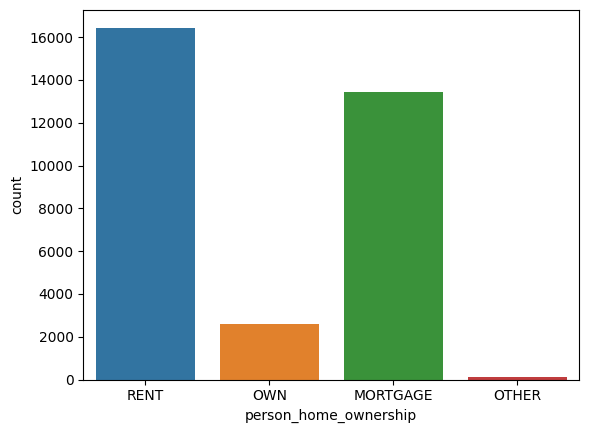

In [ ]:
#Frequency of the 'person_home_ownership' variable.
sns.countplot(x=cat['person_home_ownership'], data=cat)

<Axes: xlabel='loan_intent', ylabel='count'>

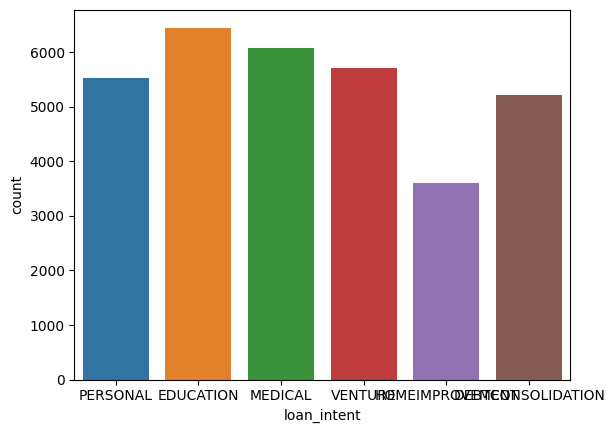

In [ ]:
#Frequency of the 'loan_intent' variable.
sns.countplot(x=cat['loan_intent'], data=cat)

<Axes: xlabel='loan_grade', ylabel='count'>

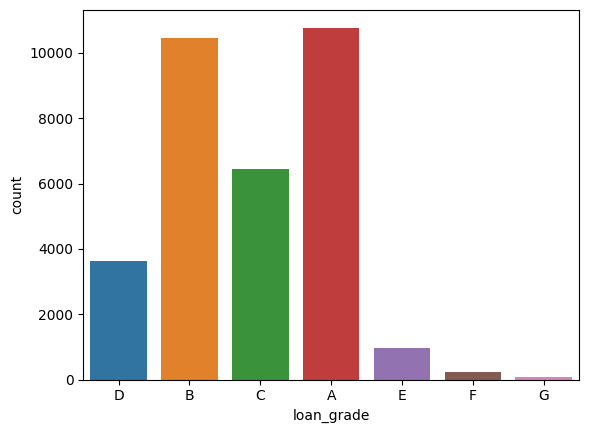

In [ ]:
#Frequency of the 'loan_grade' variable.
sns.countplot(x=cat['loan_grade'], data=cat)

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

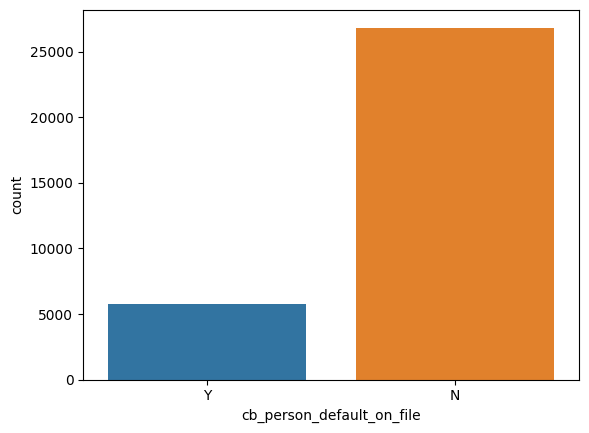

In [ ]:
#Frequency of the 'cb_person_default_on_file' variable.
sns.countplot(x=cat['cb_person_default_on_file'], data=cat)

# **Part 2**. Correlation analysis (bivariate and multivariate)

The variable `loan_status` will be the output variable (or to be predicted in an ML model). Analyze its relationship with the rest of the variables through the following graphs:

8. A box plot to display the distribution of `loan_percent_income` according to `load_status`. Interpret the result.

**Of all the loan applications, the amount requested is between 0 and 42% of the applicants' income with an average of ~18%, while, around ~21%, the loans on average are in active status.**

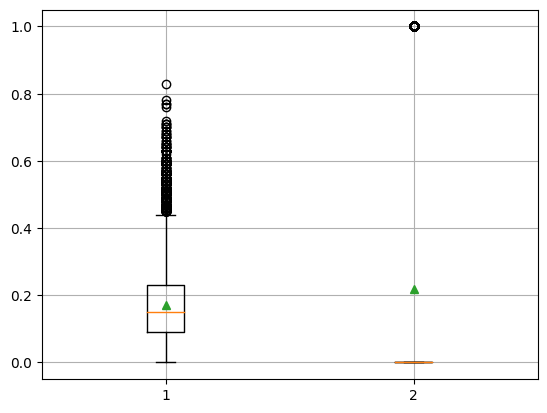

In [ ]:
plt.boxplot(df[['loan_percent_income','loan_status']], showmeans=True)
plt.grid(True)

 9. In the bar charts you obtained in exercise 7, separate the count by `load_status`, using the `hue` parameter.

In [ ]:
df['loan_status'] = df['loan_status'].map({1:"Active", 0:"Inactive"})


df['loan_status']

0          Active
1        Inactive
2          Active
3          Active
4          Active
           ...   
32576    Inactive
32577    Inactive
32578      Active
32579    Inactive
32580    Inactive
Name: loan_status, Length: 32581, dtype: object

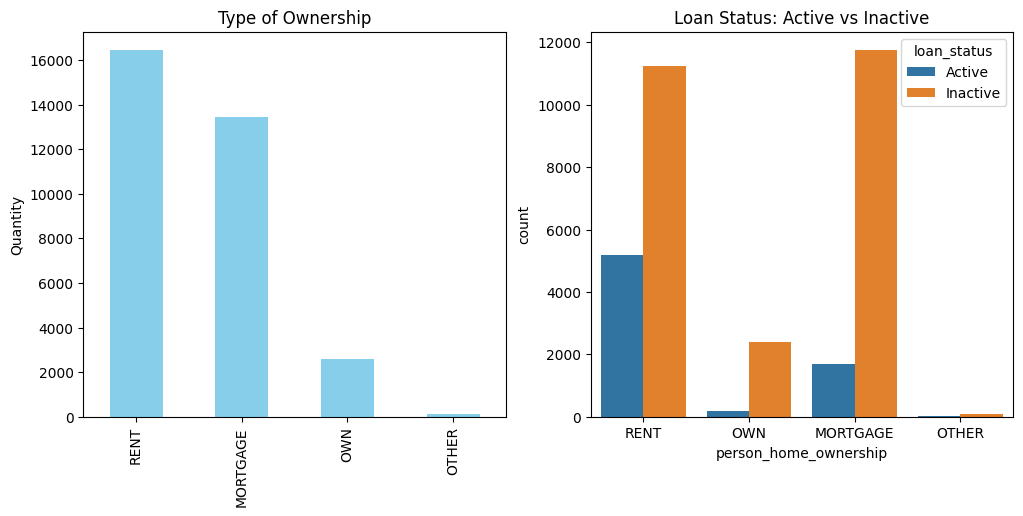

In [ ]:
#fig: figure container
#ax: number of axles inside the container
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
df['person_home_ownership'].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Type of Ownership")
ax[0].set_ylabel("Quantity")
sns.countplot(x = df['person_home_ownership'], hue = df['loan_status'], data = df, ax = ax[1])
ax[1].set_title("Loan Status: Active vs Inactive")
plt.show()

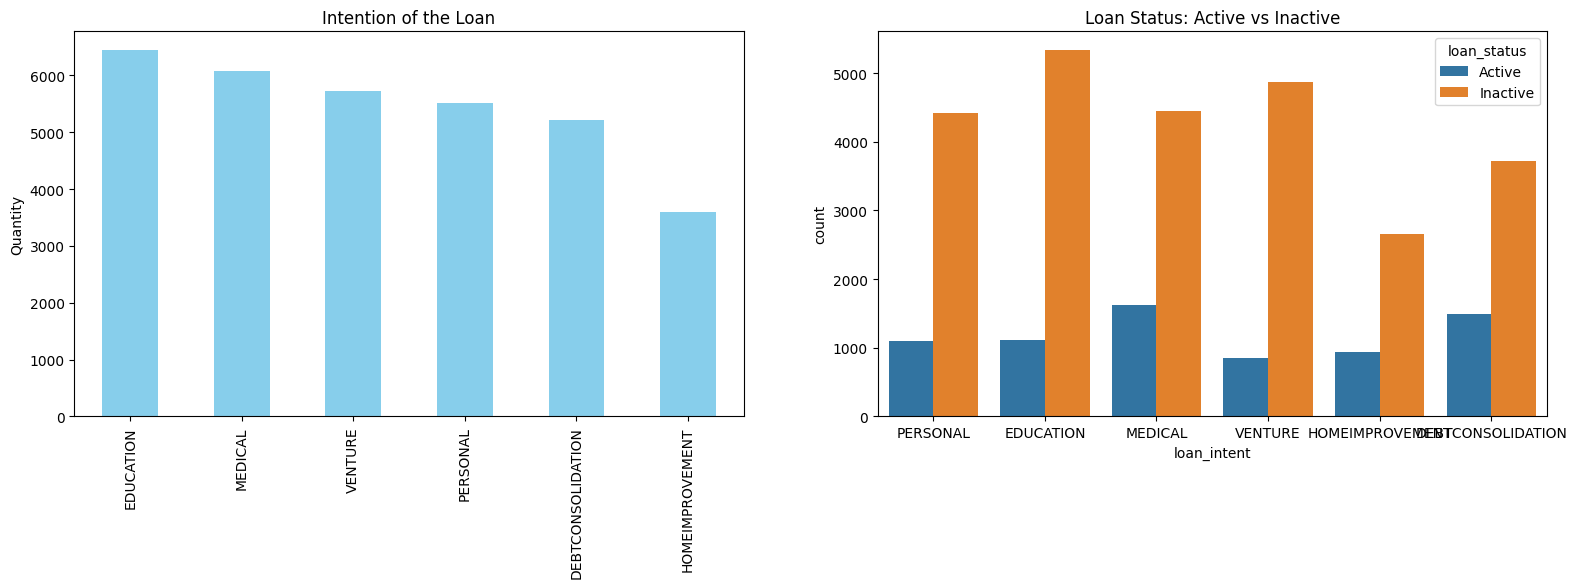

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (19, 5))
df['loan_intent'].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Intention of the Loan")
ax[0].set_ylabel("Quantity")
sns.countplot(x = df['loan_intent'], hue = df['loan_status'], data = df, ax = ax[1])
ax[1].set_title("Loan Status: Active vs Inactive")
plt.show()

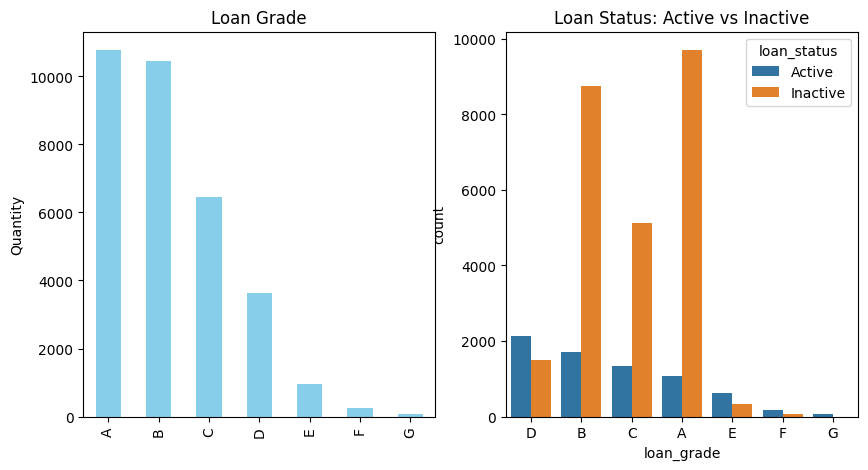

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
df['loan_grade'].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Loan Grade")
ax[0].set_ylabel("Quantity")
sns.countplot(x = df['loan_grade'], hue = df['loan_status'], data = df, ax = ax[1])
ax[1].set_title("Loan Status: Active vs Inactive")
plt.show()

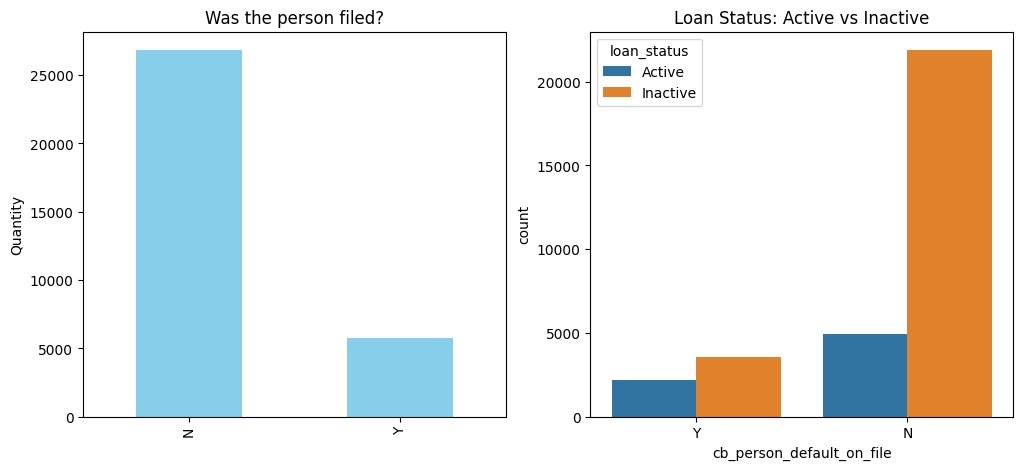

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
df['cb_person_default_on_file'].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Was the person filed?")
ax[0].set_ylabel("Quantity")
sns.countplot(x = df['cb_person_default_on_file'], hue = df['loan_status'], data = df, ax = ax[1])
ax[1].set_title("Loan Status: Active vs Inactive")
plt.show()

10. A heat map with the correlation values of all the variables in the dataframe.
*   Which variable has the greatest correlation with `loan_status`?

**The variable that has the highest correlation with `loan_status` is `cb_person_cred_hist_length`.**

In [ ]:
df['loan_status'] = df['loan_status'].map({"Active":1, "Inactive":0})

In [ ]:
Tcorrelation = df.corr(method='pearson')
Tcorrelation

<ipython-input-42-6004b698a5e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tcorrelation = df.corr(method='pearson')


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


<Axes: >

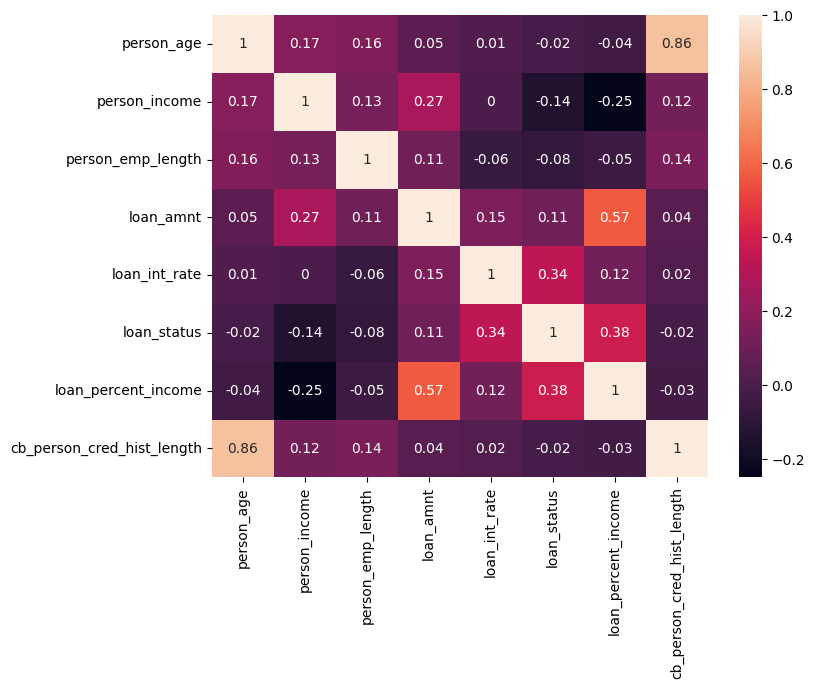

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(round(Tcorrelation,2), annot=True)